# Admission Prediction model (project ML)

**by:**<ol><b>
<li></li>
<li></li>



</b></ol>

## About model:<a id='about'></a>
This model aims to predict the chance of admission percent for master students, depending on their scores in (TOEFL, GRE, SOP, LOR), the student GPA, and the rating of the university.

## contents



- [About model](#about)
- [Import libraries](#lib)
- [Collecting (Gathering) data](#data)
- [Explore data analysis (EDA)](#eda)
>- [Statistical](#sta)
>- [Visualization](#vis)<ol><li>Univariant</li><li>Bivariant</li></ol>

- [Prepare and manipulate Data](#prepare)
>- [Cleaning](#clean)
- [Preprocessing](#pre)
>- [Split the dependent and independent variables](#spilt)
>- [Feature selection](#fs)
>>- [Filtering methods](#filter)
>>>- [Fisher’s Score](#fisher)
>>>- [Correlation Coefficient](#corr)
>>>- [Variance Threshold](#vt)
>>- [Wrapper methods](#Wrapper)
>>>- [Recursive Feature Elimination](#rfe)
>>- [Embedded methods](#Embedded)
>>>- [lasso](#lasso)
>>>- [ridge](#ridge)
>- [PCA](#PCA)
- [Model Training](#mtra)
>- [Multiple linear regression](#lr)
>>- [First model with all data variables without Feature selection or PCA](#lrm)
>>- [model after Fisher’s Score feature selection](#m_fisher)
>>- [model after Correlation Coefficient feature selection](#m_corr)
>>- [model after Variance Threshold feature selection](#m_vt)
>>- [model after Recursive Feature Elimination](#m_rfe)
>>- [lasso regression model](#m_lasso)
>>- [ridge regression model](#m_ridge)
>>- [model after PCA](#m_pca)
>- [Polynomial regression](#poly)
>- [Random forest](#Random)
- [Evaluation](#eval)
>- [Multiple linear regression](#elr)
>>- [First model with all data variables without Feature selection or PCA](#elrm)
>>- [model after Fisher’s Score feature selection](#em_fisher)
>>- [model after Correlation Coefficient feature selection](#em_corr)
>>- [model after Variance Threshold feature selection](#em_vt)
>>- [model after Recursive Feature Elimination](#em_rfe)
>>- [lasso regression model](#em_lasso)
>>- [ridge regression model](#em_ridge)
>>- [model after PCA](#em_pca)
<a id='mmmmmm'></a>

## Import libraries<a id='lib'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler   
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  
from sklearn import linear_model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Collecting (Gathering) data<a id='data'></a>

In [2]:
df=pd.read_csv('Admission_Predict_9.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         900 non-null    int64  
 1   GRE Score          900 non-null    int64  
 2   TOEFL Score        900 non-null    int64  
 3   University Rating  900 non-null    int64  
 4   SOP                900 non-null    float64
 5   LOR                900 non-null    float64
 6   CGPA               900 non-null    float64
 7   Research           900 non-null    int64  
 8   Chance of Admit    900 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 63.4 KB


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Explore data analysis (EDA)<a id='eda'></a>

### 1. Statistical<a id='sta'></a>

In [5]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.101635,-0.144103,-0.102958,-0.147834,-0.032136,-0.065213,-0.024973,0.019585
GRE Score,-0.101635,1.000000,0.831137,0.650135,0.613269,0.538649,0.829021,0.570726,0.806873
TOEFL Score,-0.144103,0.831137,1.000000,0.669767,0.650534,0.552455,0.818476,0.476830,0.791934
University Rating,-0.102958,0.650135,0.669767,1.000000,0.730656,0.631142,0.723023,0.436357,0.699380
SOP,-0.147834,0.613269,0.650534,0.730656,1.000000,0.692200,0.714796,0.424001,0.680378
LOR,-0.032136,0.538649,0.552455,0.631142,0.692200,1.000000,0.651118,0.383256,0.655735
CGPA,-0.065213,0.829021,0.818476,0.723023,0.714796,0.651118,1.000000,0.509915,0.878284
Research,-0.024973,0.570726,0.476830,0.436357,0.424001,0.383256,0.509915,1.000000,0.548968
Chance of Admit,0.019585,0.806873,0.791934,0.699380,0.680378,0.655735,0.878284,0.548968,1.000000


> **Observation:**
> chance of admit is positivly collerated with all independent variables

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [7]:
df.mode()[:1]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,312.0,110.0,3.0,4.0,3.0,8.0,1.0,0.71


### 2. Visualization<a id='vis'></a>

#### 1. Univariant

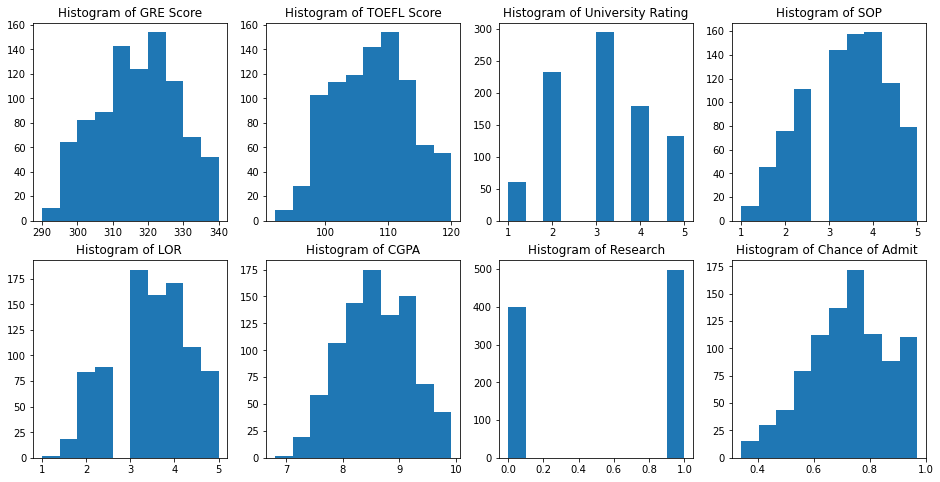

In [8]:
x=1
plt.figure(figsize=(16, 8)) 
for i in df:
    if i=='Serial No.':
        continue
    plt.subplot(2,4,x)
    plt.title('Histogram of {}'.format(str(i)))
    plt.hist(df[i]);
    x+=1

> **Observation:**
>most of the variables are normaly distibuted and left skewed

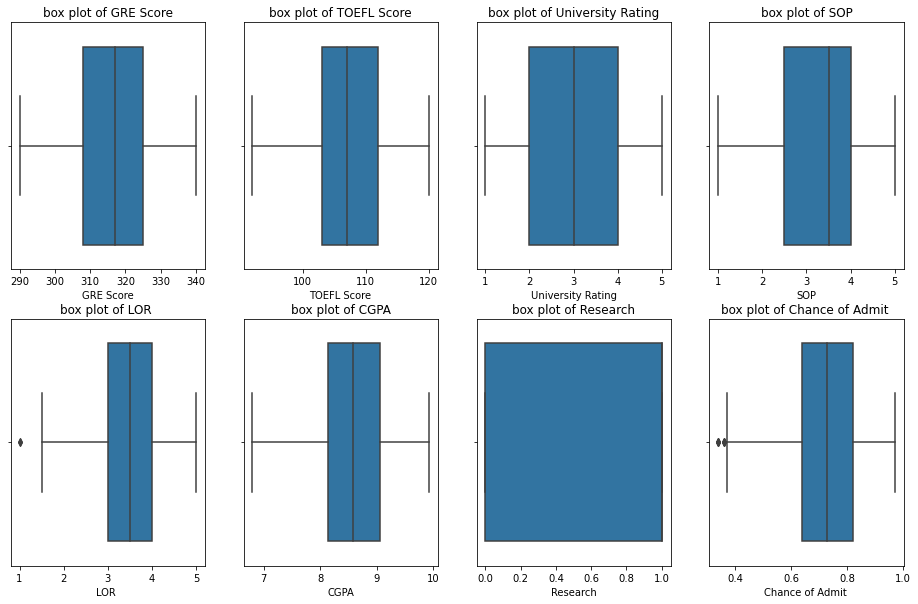

In [9]:
x=1
plt.figure(figsize=(16, 10)) 
for i in df:
    if i=='Serial No.':
        continue
    plt.subplot(2,4,x)
    plt.title('box plot of {}'.format(str(i)))
    sb.boxplot(data=df,x=i);
    x+=1

> **Observation:**
>LOR and chance of admit have outliers 

#### 2. Bivariant

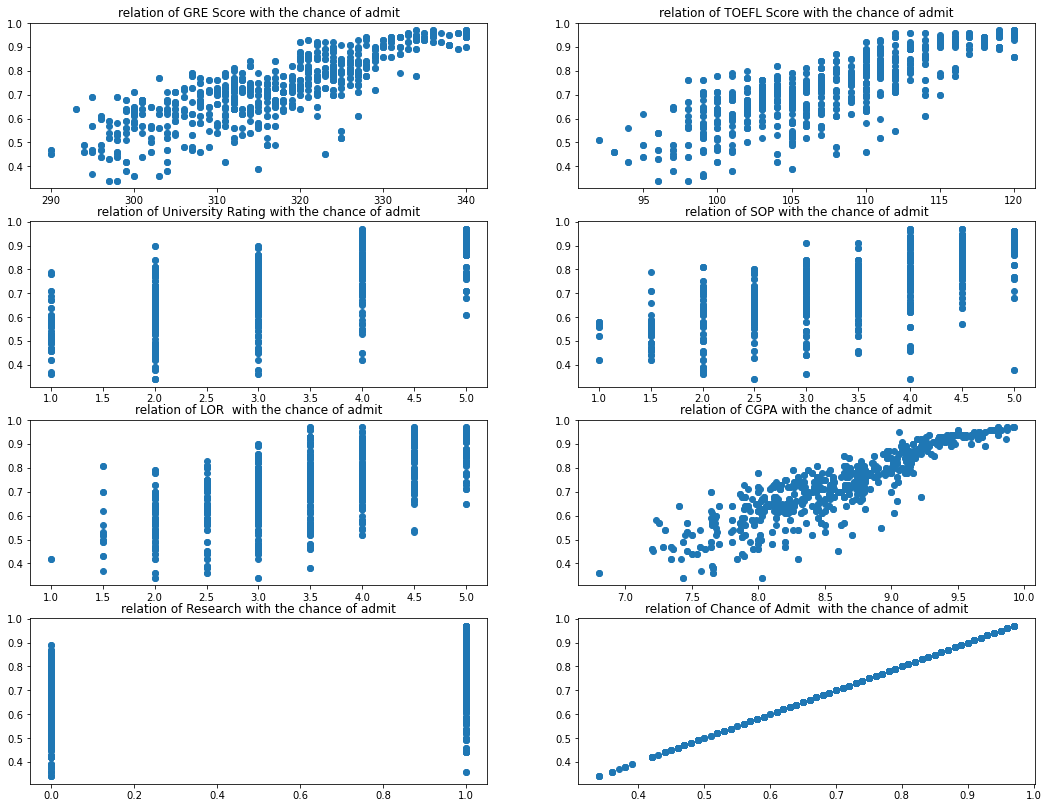

In [10]:
x=1
plt.figure(figsize=(18, 14)) 
for i in df:
    if i=='Serial No.':
        continue
    plt.subplot(4,2,x)
    plt.title('relation of {} with the chance of admit'.format(str(i)))
    plt.scatter(df[i],df['Chance of Admit ']);
    x+=1

> **Observation:**
>As mintioned above chance of admit has a proportional relations with independent variables

## Prepare and manipulate Data<a id='prepare'></a>

### 1. Cleaning<a id='clean'></a>

#### Remove columns of indexing

In [11]:
df=df.drop('Serial No.', axis=1)
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


#### Remove outliers by IQR

In [12]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1 
    print("IQR value for column %s is: %s" % (col, IQR))
    global filtered_data 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [13]:
for i in df.columns:
    if i == df.columns[0]:
      removeOutliers(df, i)
    else:
      removeOutliers(filtered_data, i)

IQR value for column GRE Score is: 17.0
IQR value for column TOEFL Score is: 9.0
IQR value for column University Rating is: 2.0
IQR value for column SOP is: 1.5
IQR value for column LOR  is: 1.0
IQR value for column CGPA is: 0.9024999999999999
IQR value for column Research is: 1.0
IQR value for column Chance of Admit  is: 0.18999999999999995


In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          874 non-null    int64  
 1   TOEFL Score        874 non-null    int64  
 2   University Rating  874 non-null    int64  
 3   SOP                874 non-null    float64
 4   LOR                874 non-null    float64
 5   CGPA               874 non-null    float64
 6   Research           874 non-null    int64  
 7   Chance of Admit    874 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 61.5 KB


In [15]:
df=filtered_data

#### Check missing values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          874 non-null    int64  
 1   TOEFL Score        874 non-null    int64  
 2   University Rating  874 non-null    int64  
 3   SOP                874 non-null    float64
 4   LOR                874 non-null    float64
 5   CGPA               874 non-null    float64
 6   Research           874 non-null    int64  
 7   Chance of Admit    874 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 61.5 KB


> **Observation:**
>No missing values

#### Check invalid data

In [17]:
df.describe()[3::4]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
min,290.0,92.0,1.0,1.0,2.0,7.20,0.0,0.36
max,340.0,120.0,5.0,5.0,5.0,9.92,1.0,0.97


> **Observation:**
>the values are valid 

# Preprocessing <a id='pre'></a>

## Split the dependent and independent variables<a id='spilt'></a>

In [18]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
x.shape

(874, 7)

In [20]:
y[:10]

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.45, 0.52])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
len(X_train)

699

In [23]:
len(X_test)

175

In [24]:
X_train

array([[316.  , 102.  ,   3.  , ...,   3.  ,   7.4 ,   0.  ],
       [339.  , 119.  ,   5.  , ...,   4.  ,   9.7 ,   0.  ],
       [329.  , 119.  ,   4.  , ...,   4.5 ,   9.16,   1.  ],
       ...,
       [314.  , 107.  ,   2.  , ...,   4.  ,   8.56,   0.  ],
       [321.  , 111.  ,   4.  , ...,   4.  ,   8.97,   1.  ],
       [322.  , 105.  ,   2.  , ...,   3.  ,   8.45,   1.  ]])

In [25]:
X_train.shape

(699, 7)

In [26]:
X_test.shape

(175, 7)

## Feature selection<a id='fs'></a>

### Filtering methods<a id='filter'></a>

#### 1. Fisher’s Score<a id='fisher'></a>

In [27]:
scores=fisher_score.fisher_score(X_train,y_train)
scores

array([1, 6, 5, 4, 3, 2, 0])

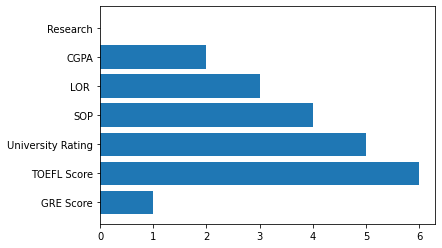

In [28]:
plt.barh(df.columns[:-1],scores);

In [29]:
feature_importance={}
for i in range(len(scores)):
    feature_importance[df.columns[i]]=scores[i]
fisher_data=pd.DataFrame(feature_importance.items(), columns=['x', 'fisher_score'])
fisher_data

,x,fisher_score
0,GRE Score,1
1,TOEFL Score,6
2,University Rating,5
3,SOP,4
4,LOR,3
5,CGPA,2
6,Research,0


In [30]:
cols=[]
for i in range(fisher_data.shape[0]):
    if fisher_data.iloc[i,-1]>=3:
        cols.append(i)
x_fisher= df.iloc[:,cols ].values
x_fisher

array([[118. ,   4. ,   4.5,   4.5],
       [107. ,   4. ,   4. ,   4.5],
       [104. ,   3. ,   3. ,   3.5],
       ...,
       [120. ,   5. ,   4.5,   5. ],
       [103. ,   4. ,   4. ,   5. ],
       [113. ,   4. ,   4.5,   4.5]])

In [31]:
x_fisher_train, x_fisher_test, y_train, y_test = train_test_split(x_fisher, y, test_size = 0.2, random_state = 0)

In [32]:
len(x_fisher_train)

699

In [33]:
len(x_fisher_test)

175

#### 2.Correlation Coefficient <a id='corr'></a>

In [34]:
cor=df.corr()

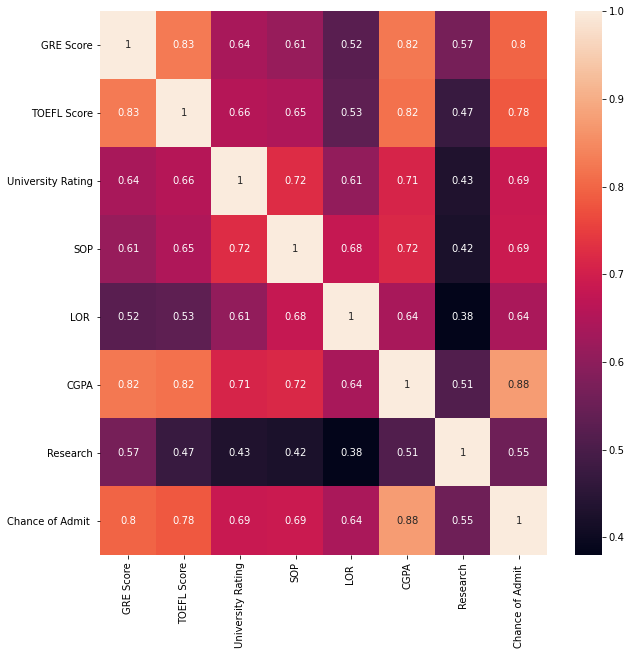

In [35]:
plt.figure(figsize = [10, 10])
sb.heatmap(cor, annot=True);

In [36]:
fs = SelectKBest(score_func=f_regression, k=4) #Pearson correlation coefficient

In [37]:
X_corr= fs.fit_transform(x, y)
X_corr.shape

(874, 4)

In [38]:
X_corr_train, X_corr_test, y_train, y_test = train_test_split(X_corr, y, test_size = 0.2, random_state = 0)

In [39]:
len(X_corr_train)

699

In [40]:
len(X_corr_test)

175

#### 3.Variance Threshold<a id='vt'></a>

In [41]:
V_Threshold=VarianceThreshold(threshold=0.5)

In [42]:
V_Threshold.fit(x)

VarianceThreshold(threshold=0.5)

In [43]:
mask=V_Threshold.get_support()
mask= np.append(mask, mask[-1])

In [44]:
x_VT = df.iloc[:, mask].values
x_VT.shape

(874, 5)

In [45]:
x_VT_train, x_VT_test, y_train, y_test = train_test_split(x_VT, y, test_size = 0.2, random_state = 0)

In [46]:
len(x_VT_train)

699

In [47]:
len(x_VT_test)

175

### Wrapper methods<a id='Wrapper'></a>

#### Recursive Feature Elimination<a id='rfe'></a>

In [48]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)

In [49]:
rfe.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

### Embedded methods<a id='Embedded'></a>

#### 1. lasso<a id='lasso'></a>

In [50]:
Lasso_reg= linear_model.Lasso()

#### 2. ridge<a id='ridge'></a>

In [51]:
Ridge_reg=linear_model.Ridge()

## PCA<a id='PCA'></a>

In [52]:
scaler=StandardScaler()
scaler.fit(X_train)
X_PCA_train=scaler.transform(X_train)
X_PCA_test=scaler.transform(X_test)

In [53]:
pca = PCA(n_components=5)
pca.fit(X_PCA_train)

PCA(n_components=5)

In [54]:
X_PCA_train.shape

(699, 7)

In [55]:
pca.get_covariance()

array([[1.0054005 , 0.82234618, 0.64215344, 0.64025066, 0.52004261,
        0.81520201, 0.56259666],
       [0.82234618, 0.99539005, 0.65876351, 0.66828966, 0.52520323,
        0.81609641, 0.45709044],
       [0.64215344, 0.65876351, 1.00146198, 0.72709209, 0.61150183,
        0.72324633, 0.42632056],
       [0.64025066, 0.66828966, 0.72709209, 1.0016442 , 0.68354136,
        0.7370935 , 0.43193998],
       [0.52004261, 0.52520323, 0.61150183, 0.68354136, 1.00137531,
        0.6348675 , 0.37480429],
       [0.81520201, 0.81609641, 0.72324633, 0.7370935 , 0.6348675 ,
        1.00339738, 0.51872207],
       [0.56259666, 0.45709044, 0.42632056, 0.43193998, 0.37480429,
        0.51872207, 1.00135923]])

In [56]:
pca.explained_variance_ratio_

array([0.6798425 , 0.10408413, 0.08136473, 0.05061548, 0.03689421])

In [57]:
pca.singular_values_

array([57.67555231, 22.56731398, 19.95288469, 15.73726561, 13.43589823])

In [58]:
X_PCA_train=pca.transform(X_PCA_train)
X_PCA_test=pca.transform(X_PCA_test)

In [59]:
X_PCA_train.shape

(699, 5)

In [60]:
X_PCA_test.shape

(175, 5)

## Model Training<a id='mtra'></a>

### Multiple linear regression<a id='lr'></a>

### First model with all data varibles without Feature selection or PCA<a id='lrm'></a>

In [61]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
y_hat= regressor.predict(X_test)
pre= np.concatenate((y_hat.reshape(len(y_hat),1), y_test.reshape(len(y_test),1)),1)

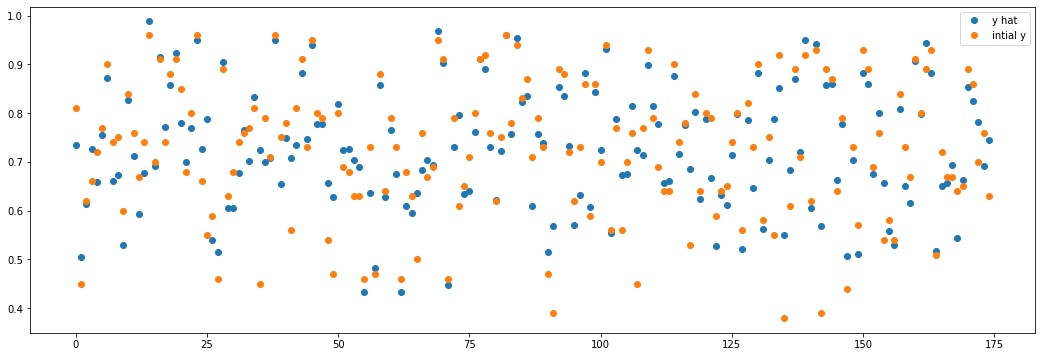

In [149]:
plt.figure(figsize = [18, 6])
plt.plot(pre,'o');
plt.legend(['y hat', 'intial y']);

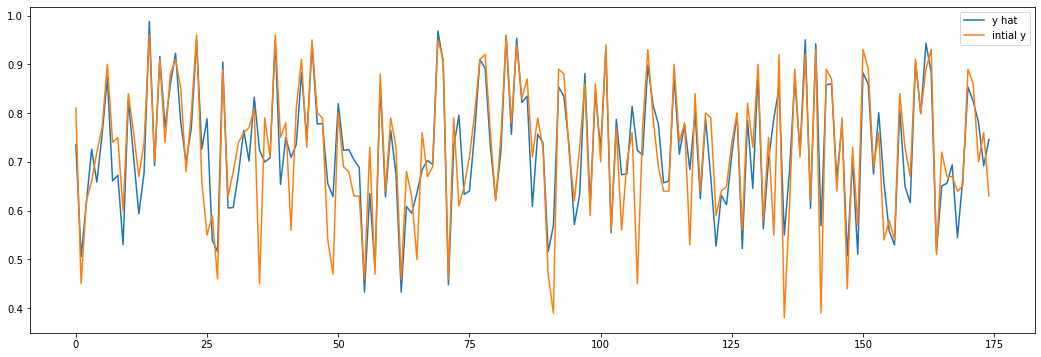

In [150]:
plt.figure(figsize = [18, 6])
plt.plot(pre);
plt.legend(['y hat', 'intial y']);

### second model with all data varibles with Feature selection 

### Filtering methods

#### 1. Fisher’s Score<a id='m_fisher'></a>

In [65]:
regressor_fisher = LinearRegression()
regressor_fisher.fit(x_fisher_train, y_train)

LinearRegression()

In [66]:
y_hat_fisher= regressor_fisher.predict(x_fisher_test)
pre_fisher= np.concatenate((y_hat_fisher.reshape(len(y_hat_fisher),1), y_test.reshape(len(y_test),1)),1)

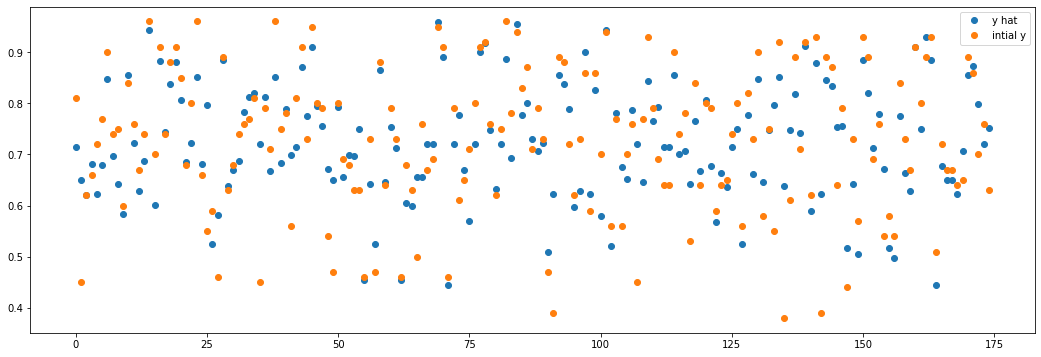

In [151]:
plt.figure(figsize = [18, 6])
plt.plot(pre_fisher,'o');
plt.legend(['y hat', 'intial y']);

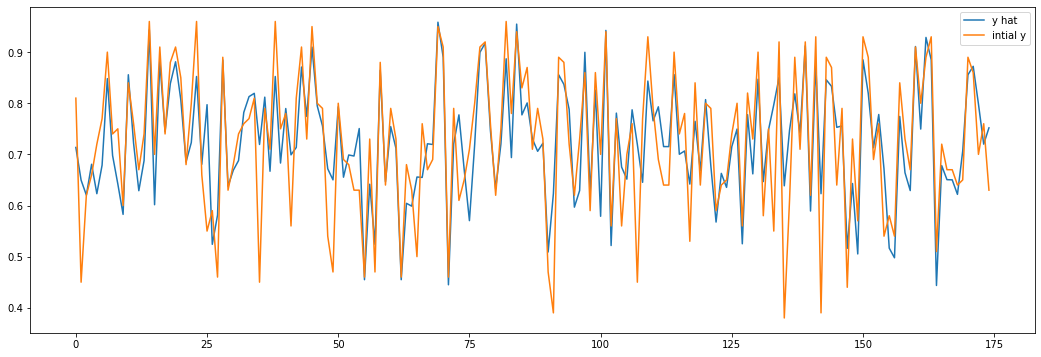

In [152]:
plt.figure(figsize = [18, 6])
plt.plot(pre_fisher);
plt.legend(['y hat', 'intial y']);

#### 2.Correlation Coefficient <a id='m_corr'></a>


In [69]:
regressor_corr = LinearRegression()
regressor_corr.fit(X_corr_train, y_train)

LinearRegression()

In [70]:
y_hat_corr = regressor_corr.predict(X_corr_test)
pre_corr= np.concatenate((y_hat_corr.reshape(len(y_hat_corr),1), y_test.reshape(len(y_test),1)),1)

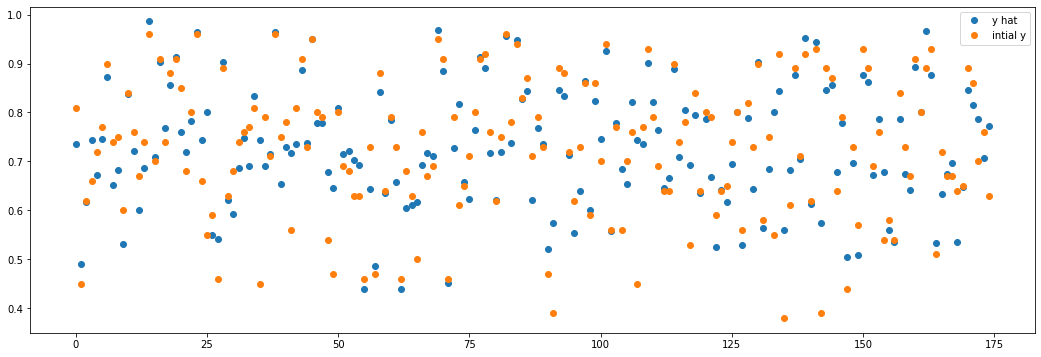

In [153]:
plt.figure(figsize = [18, 6])
plt.plot(pre_corr,'o');
plt.legend(['y hat', 'intial y']);

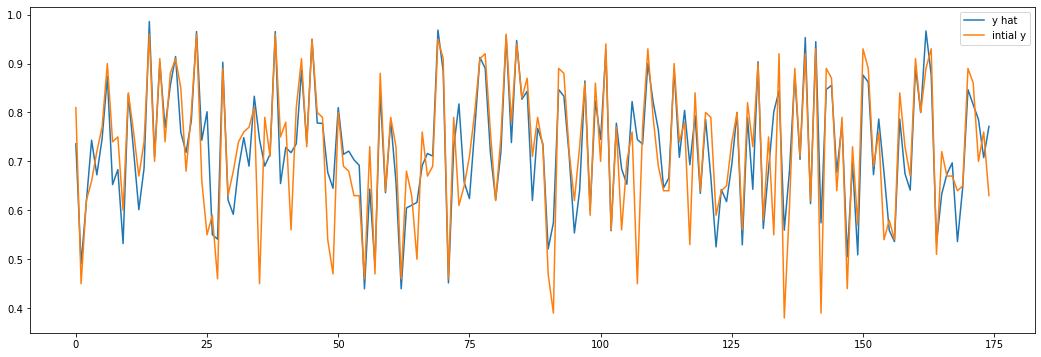

In [154]:
plt.figure(figsize = [18, 6])
plt.plot(pre_corr);
plt.legend(['y hat', 'intial y']);

#### 3.Variance Threshold<a id='m_vt'></a>


In [73]:
regressor_VT = LinearRegression()
regressor_VT.fit(x_VT_train, y_train)

LinearRegression()

In [74]:
y_hat_VT = regressor_VT.predict(x_VT_test)
pre_VT= np.concatenate((y_hat_VT.reshape(len(y_hat_VT),1), y_test.reshape(len(y_test),1)),1)

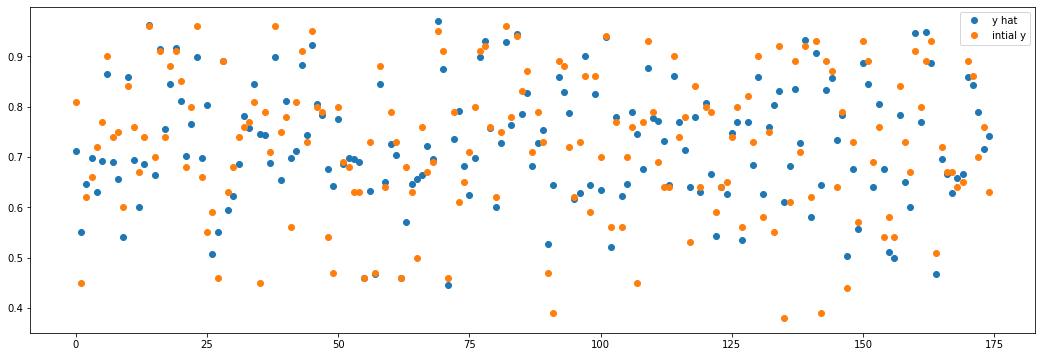

In [155]:
plt.figure(figsize = [18, 6])
plt.plot(pre_VT,'o');
plt.legend(['y hat', 'intial y']);

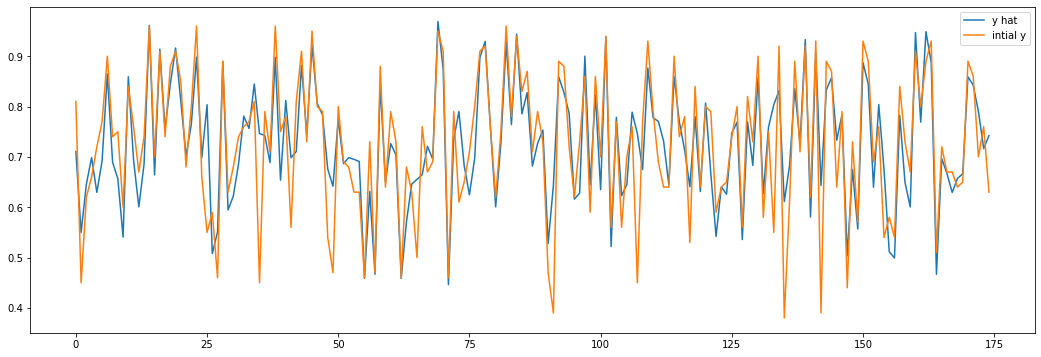

In [156]:
plt.figure(figsize = [18, 6])
plt.plot(pre_VT);
plt.legend(['y hat', 'intial y']);

### Warpper methods

#### Recursive Feature Elimination<a id='m_rfe'></a>


In [77]:
y_hat_rfe = rfe.predict(X_test)
pre_rfe= np.concatenate((y_hat_rfe.reshape(len(y_hat_rfe),1), y_test.reshape(len(y_test),1)),1)

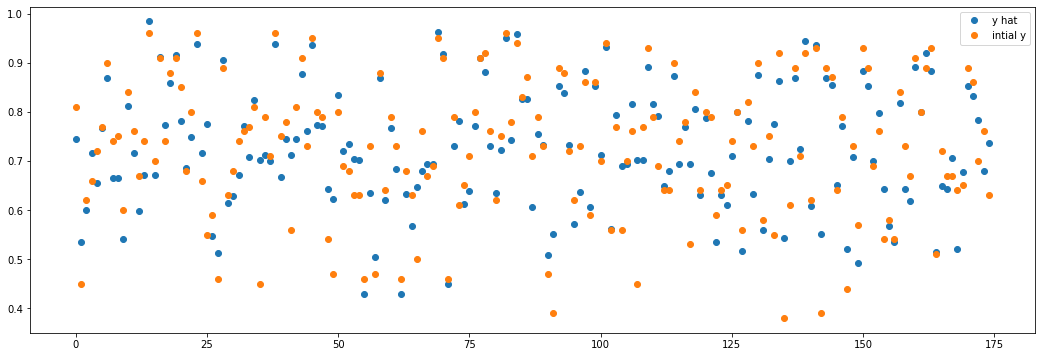

In [157]:
plt.figure(figsize = [18, 6])
plt.plot(pre_rfe,'o');
plt.legend(['y hat', 'intial y']);

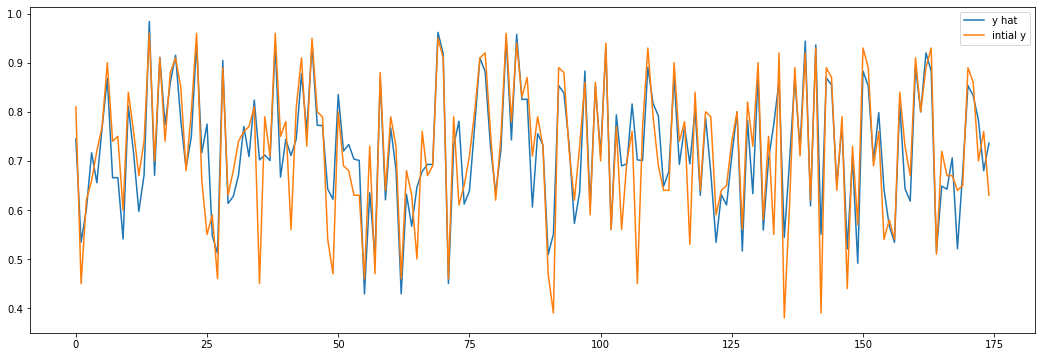

In [158]:
plt.figure(figsize = [18, 6])
plt.plot(pre_rfe);
plt.legend(['y hat', 'intial y']);

### Embedded methods

#### 1. lasso<a id='m_lasso'></a>


In [80]:
Lasso_reg.fit(X_train, y_train)

Lasso()

In [81]:
y_hat_lasso= Lasso_reg.predict(X_test)
pre_lasso= np.concatenate((y_hat_lasso.reshape(len(y_hat_lasso),1), y_test.reshape(len(y_test),1)),1)

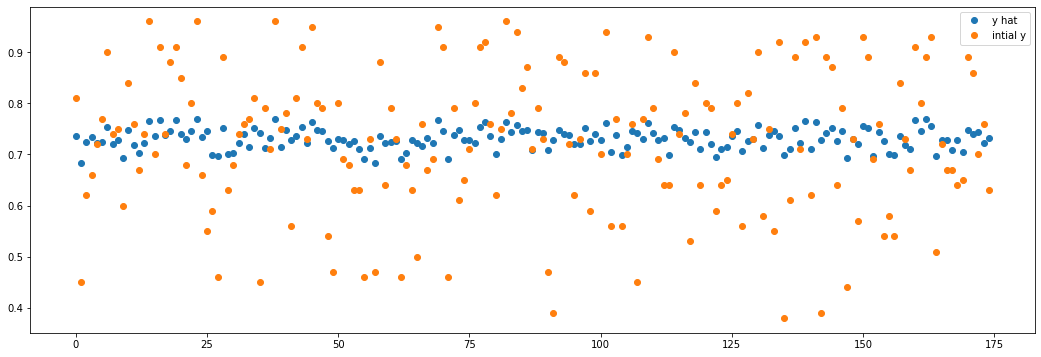

In [159]:
plt.figure(figsize = [18, 6])
plt.plot(pre_lasso,'o');
plt.legend(['y hat', 'intial y']);

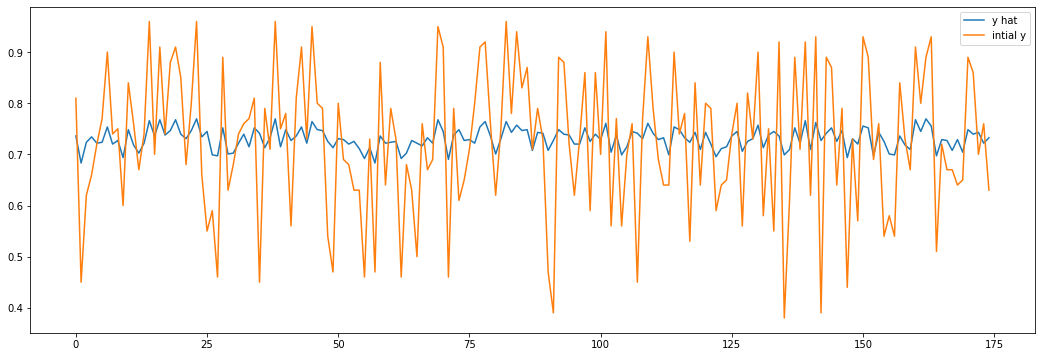

In [160]:
plt.figure(figsize = [18, 6])
plt.plot(pre_lasso);
plt.legend(['y hat', 'intial y']);

#### 2. ridge<a id='m_ridge'></a>


In [84]:
Ridge_reg.fit(X_train, y_train)

Ridge()

In [85]:
y_hat_Ridge= Ridge_reg.predict(X_test)
pre_Ridge= np.concatenate((y_hat_Ridge.reshape(len(y_hat_Ridge),1), y_test.reshape(len(y_test),1)),1)

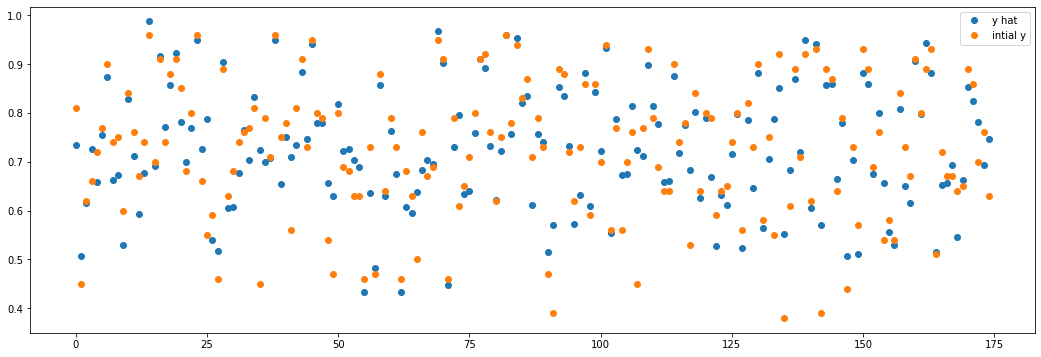

In [161]:
plt.figure(figsize = [18, 6])
plt.plot(pre_Ridge,'o');
plt.legend(['y hat', 'intial y']);

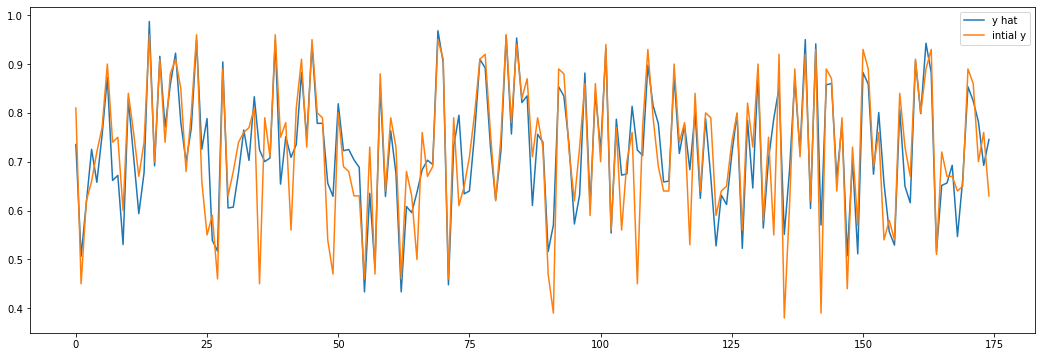

In [162]:
plt.figure(figsize = [18, 6])
plt.plot(pre_Ridge);
plt.legend(['y hat', 'intial y']);

### model after PCA
<a id='m_pca'></a>

In [89]:
regressor_pca = LinearRegression()
regressor_pca.fit(X_PCA_train, y_train)

LinearRegression()

In [91]:
y_hat_pca= regressor_pca.predict(X_PCA_test)
pre_pca= np.concatenate((y_hat_pca.reshape(len(y_hat_pca),1), y_test.reshape(len(y_test),1)),1)

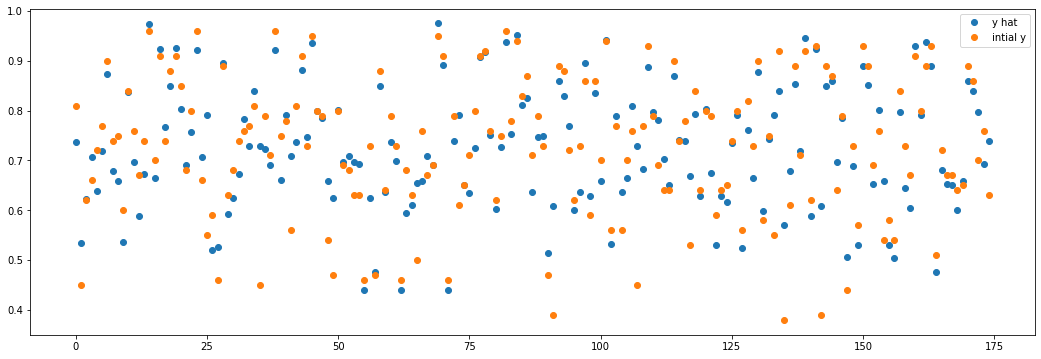

In [163]:
plt.figure(figsize = [18, 6])
plt.plot(pre_pca,'o');
plt.legend(['y hat', 'intial y']);

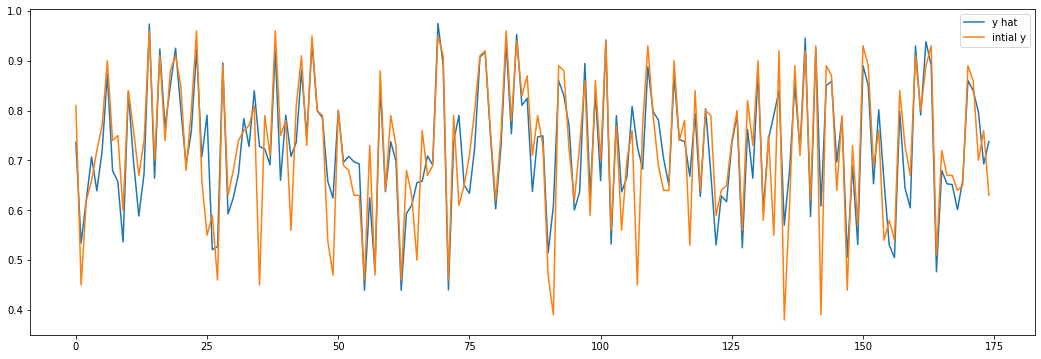

In [164]:
plt.figure(figsize = [18, 6])
plt.plot(pre_pca);
plt.legend(['y hat', 'intial y']);

### Polynomial regression<a id='poly'></a>

In [94]:
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X_train)
print(X_train.shape)
print(X_poly.shape)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

(699, 7)
(699, 120)


LinearRegression()

In [95]:
y_hat_poly=lin_reg_2.predict(poly_reg.fit_transform(X_test))
pre_poly= np.concatenate((y_hat_poly.reshape(len(y_hat_poly),1), y_test.reshape(len(y_test),1)),1)

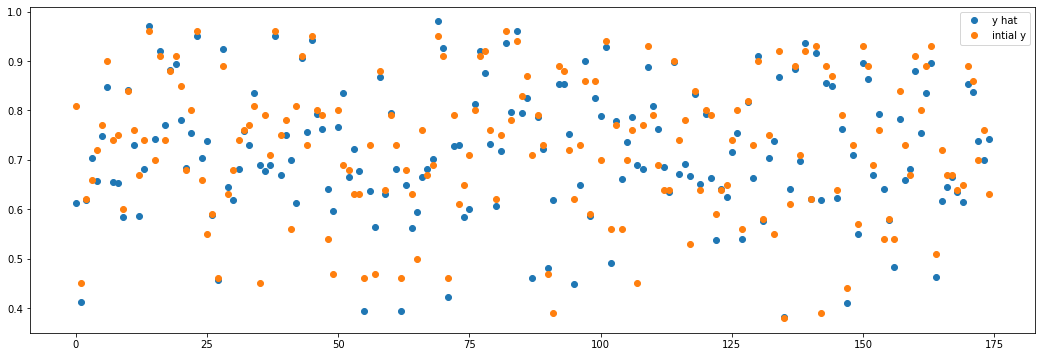

In [165]:
plt.figure(figsize = [18, 6])
plt.plot(pre_poly,'o');
plt.legend(['y hat', 'intial y']);

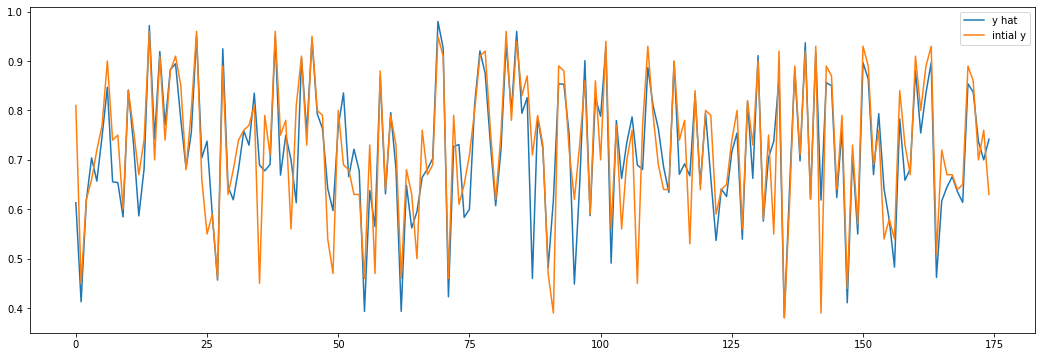

In [166]:
plt.figure(figsize = [18, 6])
plt.plot(pre_poly);
plt.legend(['y hat', 'intial y']);

### Random forest<a id='Random'></a>

In [98]:
random_regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
random_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [99]:
y_hat_random = random_regressor.predict(X_test) 
pre_random= np.concatenate((y_hat_random.reshape(len(y_hat_random),1), y_test.reshape(len(y_test),1)),1)

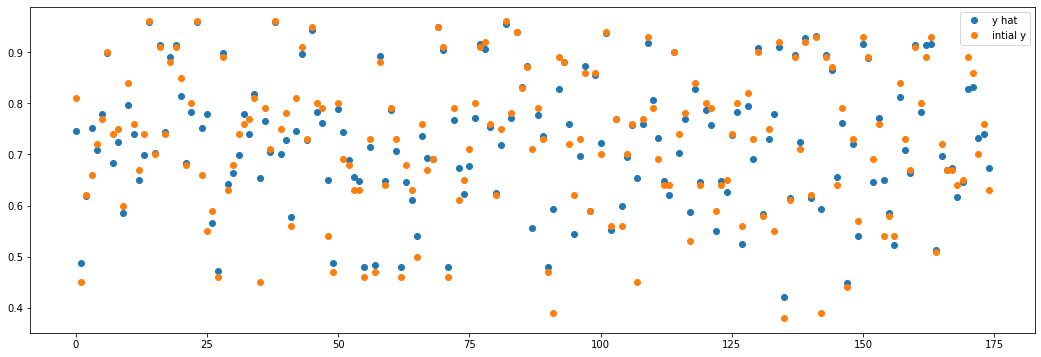

In [167]:
plt.figure(figsize = [18, 6])
plt.plot(pre_random,'o');
plt.legend(['y hat', 'intial y']);

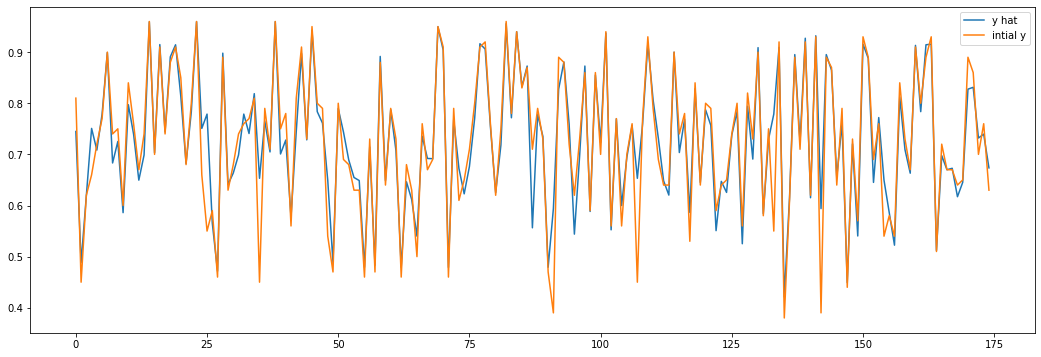

In [168]:
plt.figure(figsize = [18, 6])
plt.plot(pre_random);
plt.legend(['y hat', 'intial y']);

## Evaluation<a id='eval'></a>

## Multiple linear regression<a id='elr'></a>

### First model with all data varibles without Feature selection or PCA<a id='elrm'></a>

In [102]:
regressor.score(X_train,y_train)

0.8215859720432825

In [103]:
regressor.score(X_test,y_test)

0.7526535171313613

In [104]:
mean_squared_error(y_test,y_hat)

0.004873679561316323

In [105]:
regressor.coef_

array([0.00189872, 0.00272482, 0.00468919, 0.00441766, 0.01414819,
       0.11902267, 0.01747233])

### second model with all data varibles with Feature selection 

### Filtering methods

#### 1. Fisher’s Score<a id='em_fisher'></a>

In [106]:
regressor_fisher.score(x_fisher_train,y_train)

0.7182094353183374

In [107]:
regressor_fisher.score(x_fisher_test,y_test)

0.658719803546636

In [108]:
mean_squared_error(y_test,y_hat_fisher)

0.0067245359580072285

In [109]:
regressor_fisher.coef_

array([0.01130428, 0.01888474, 0.01983598, 0.02743498])

#### 2.Correlation Coefficient <a id='em_corr'></a>

In [110]:
regressor_corr.score(X_corr_train,y_train)

0.8132756173652052

In [111]:
regressor_corr.score(X_corr_test,y_test)

0.7227359432706097

In [112]:
mean_squared_error(y_test,y_hat_corr)

0.005463171138306939

In [113]:
regressor_corr.coef_

array([0.00224952, 0.00255713, 0.01341938, 0.13116759])

#### 3.Variance Threshold<a id='em_vt'></a>

In [114]:
regressor_VT.score(x_VT_train,y_train)

0.762142725947647

In [115]:
regressor_VT.score(x_VT_test,y_test)

0.6915485759657103

In [116]:
mean_squared_error(y_test,y_hat_VT)

0.0060776825428854155

In [117]:
regressor_VT.coef_

array([0.00459311, 0.00556507, 0.01349266, 0.01574446, 0.02497771])

### Warpper methods

#### Recursive Feature Elimination<a id='em_rfe'></a>

In [118]:
rfe.score(X_train,y_train)

0.8146294400258863

In [119]:
rfe.score(X_test,y_test)

0.7627740860997202

In [120]:
mean_squared_error(y_test,y_hat_rfe)

0.0046742653244210355

### Embedded methods

#### 1. lasso<a id='em_lasso'></a>

In [121]:
Lasso_reg.score(X_train,y_train)

0.21424858176462103

In [122]:
Lasso_reg.score(X_test,y_test)

0.19666111127367103

In [123]:
mean_squared_error(y_test,y_hat_lasso)

0.01582887404497835

In [124]:
Ridge_reg.coef_

array([0.00194486, 0.00278293, 0.00485322, 0.00463594, 0.01430262,
       0.11671634, 0.01743151])

#### 2. ridge<a id='em_ridge'></a>

In [125]:
Ridge_reg.score(X_train,y_train)

0.8215651740815444

In [126]:
Ridge_reg.score(X_test,y_test)

0.7526496680869295

In [127]:
mean_squared_error(y_test,y_hat_Ridge)

0.004873755402334801

In [128]:
Ridge_reg.coef_

array([0.00194486, 0.00278293, 0.00485322, 0.00463594, 0.01430262,
       0.11671634, 0.01743151])

### Third model with all data varibles with  PCA<a id='em_pca'></a>

In [133]:
regressor_pca.score(X_PCA_train, y_train)

0.8019193093595455

In [134]:
regressor_pca.score(X_PCA_test,y_test)

0.7365744705676793

In [136]:
mean_squared_error(y_test,y_hat_pca)

0.005190498784674709

In [137]:
regressor_pca.coef_

array([-0.05489747, -0.00654473, -0.01714748,  0.01697355, -0.00610042])

### Polynomial regression<a id='epoly'></a>

In [138]:
lin_reg_2.score(X_poly, y_train)

0.8568177617067396

In [139]:
lin_reg_2.score(poly_reg.fit_transform(X_test),y_test)

0.735210571521044

In [140]:
mean_squared_error(y_test,y_hat_poly)

0.005217372855533504

In [141]:
lin_reg_2.coef_[:40]

array([ 5.72272159e+05,  6.42076416e-01,  1.10484314e+00, -5.53302050e+00,
        3.76000879e+00, -1.43219329e+00, -1.27987050e+01, -3.18264747e-01,
       -6.05734061e-03,  1.29636942e-02,  2.18792844e-04, -2.67894407e-02,
        2.76445166e-02,  1.31477070e-01,  3.26798734e-02, -3.35499181e-02,
        1.10236967e-01,  2.24485415e-02, -2.47145999e-02,  8.29066071e-02,
       -6.75813221e-02, -7.04209264e-02,  4.10014858e-01, -5.05339938e-02,
       -2.03322217e-01, -2.37588002e-02, -6.76244913e-01,  2.98293814e-01,
        9.38418428e-02, -1.26307847e-01,  7.74581223e-02, -6.11789047e-01,
        5.27571960e-01, -1.27439734e+00, -4.14232849e-01, -3.18265007e-01,
        1.51449504e-05, -6.11722058e-05,  1.70510087e-05,  9.84713295e-06])

### Random forest<a id='eRandom'></a>

In [142]:
random_regressor.score(X_train, y_train)

0.9886491171156704

In [143]:
random_regressor.score(X_test,y_test)

0.8739849520392238

In [144]:
mean_squared_error(y_test,y_hat_random)

0.0024829824